In [695]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from xgboost import XGBRegressor

In [696]:
df = pd.read_csv('wine.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


EKSİK DEĞER ANALİZİ


In [698]:
eksik_sayisi = df.isnull().sum()
print("Eksik Değerler: \n", eksik_sayisi)

Eksik Değerler: 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<ipython-input-699-d6179d5350d1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=df, ci='sd')  # sd = standart sapma


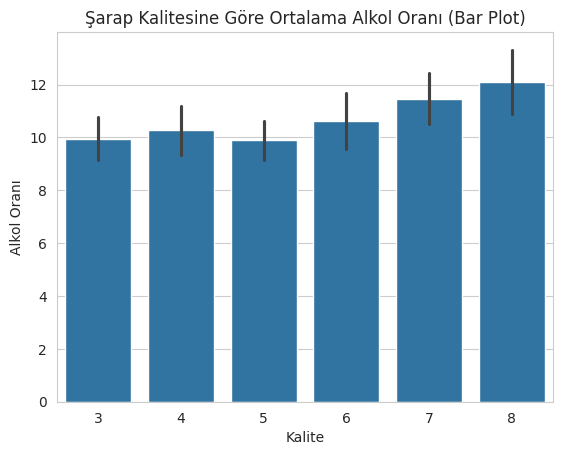

In [699]:
sns.barplot(x='quality', y='alcohol', data=df, ci='sd')  # sd = standart sapma
plt.title('Şarap Kalitesine Göre Ortalama Alkol Oranı (Bar Plot)')
plt.xlabel('Kalite')
plt.ylabel('Alkol Oranı')
plt.show()



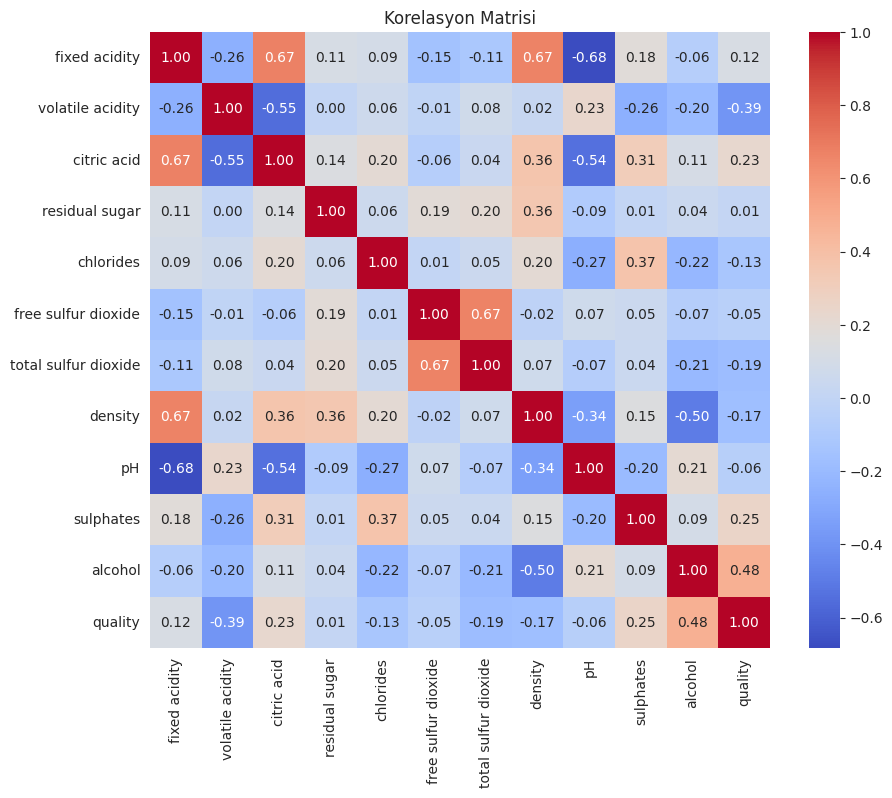

In [700]:
corr_matrix = df.corr(numeric_only=True)

# Görselleştir (isteğe bağlı)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

KATEGORİK VERİLERİ NUMERİC HALE DÖNÜŞTÜRME

In [701]:
df.info()        # tüm veriler numeric olduğu için herhangi bir dönüştürme yapılmadı

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


VERİ SETİNİN TEMİZLENMESİ

In [702]:
df = df.drop(columns=["residual sugar","pH","free sulfur dioxide","density","chlorides","total sulfur dioxide"])
df.head(3)

,fixed acidity,volatile acidity,citric acid,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.56,9.4,5
1,7.8,0.88,0.00,0.68,9.8,5
2,7.8,0.76,0.04,0.65,9.8,5


In [703]:
y = df['quality']
x = df.drop('quality',axis=1)

In [704]:
x_train, x_test, y_train,y_test = train_test_split(x,y,train_size = 0.70, random_state=22)

LINEAR REGRESSION

In [705]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
y_tahmin = model.predict(x_test)
mae_lm = mean_absolute_error(y_test, y_tahmin)
mape_lm = mean_absolute_percentage_error(y_test, y_tahmin)
rmse_lm = np.sqrt(mean_squared_error(y_test, y_tahmin))


# Performans Metrikleri
print(f"Linear Regression MAE: {mae_lm:.2f}")          # Tahminlerin ortalama olarak gerçek değerlerden ne kadar uzak olduğunu pozitif olarak verir
print(f"Linear Regression MAPE: {mape_lm:.2%}")        # Tahminlerin gerçek değerlere göre ne kadar % sapma gösterdiğini söyler
print(f"Linear Regression RMSE: {rmse_lm:.2f}")        # Hataların karelerinin ortalamasının karekökünü alır, modeldeki büyük hataları yakalar

Linear Regression MAE: 0.50
Linear Regression MAPE: 9.14%
Linear Regression RMSE: 0.63


DECISION TREE REGRESSOR

In [706]:
dt = DecisionTreeRegressor()
model_2 = dt.fit(x_train, y_train)
y_tahmin_2 = model_2.predict(x_test)
mae_dt = mean_absolute_error(y_test, y_tahmin_2)
mape_dt = mean_absolute_percentage_error(y_test, y_tahmin_2)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_tahmin))

# Performans Metrikleri
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"Decision Tree MAPE: {mape_dt:.2%}")
print(f"Decision Tree RMSE: {rmse_dt:.2f}")

Decision Tree MAE: 0.48
Decision Tree MAPE: 8.79%
Decision Tree RMSE: 0.63


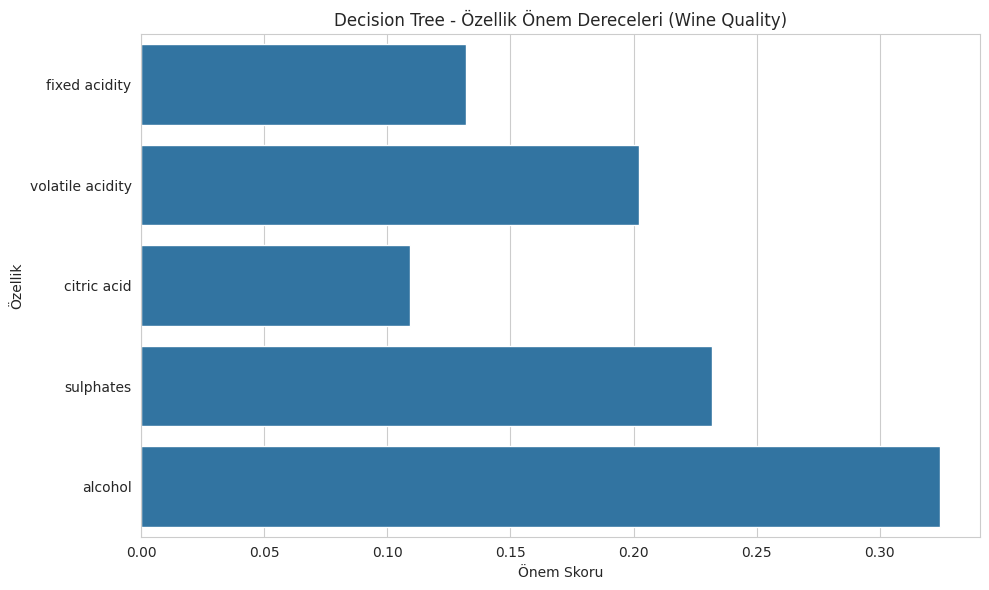

In [707]:
importances = dt.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Decision Tree - Özellik Önem Dereceleri (Wine Quality)')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

RANDOM FOREST REGRESSOR

In [708]:
rf = RandomForestRegressor()
model_3 = rf.fit(x_train, y_train)
y_tahmin_3 = model_3.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_tahmin_3)
mape_rf = mean_absolute_percentage_error(y_test, y_tahmin_3)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_tahmin))


# Performans Metrikleri
print(f"Random Forest Regressor MAE: {mae_rf:.2f}")
print(f"Random Forest Regressor MAPE: {mape_rf:.2%}")
print(f"Random Forest Regressor RMSE: {rmse_rf:.2f}")

Random Forest Regressor MAE: 0.45
Random Forest Regressor MAPE: 8.18%
Random Forest Regressor RMSE: 0.63


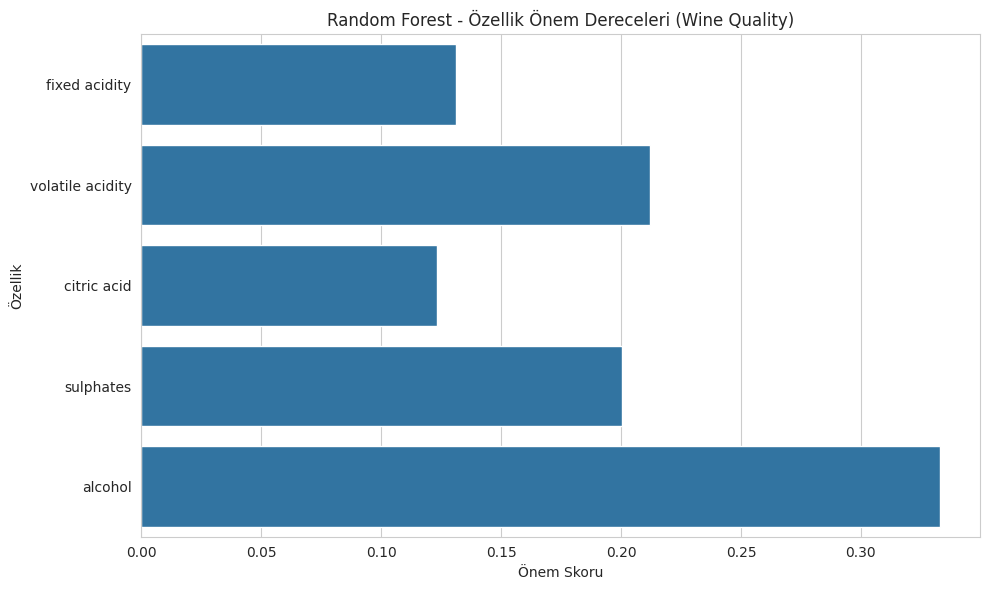

In [709]:
importances = rf.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Random Forest - Özellik Önem Dereceleri (Wine Quality)')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

MODELLERİN KARŞILAŞTIRILMASI (LINEAR REGRESSION, DECISION TREE REGRESSOR, RANDOM FOREST REGRESSOR)


In [710]:
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
predictions = [y_tahmin, y_tahmin_2, y_tahmin_3]
performance_data =[]                               # her model için hata metrikleri bu listeye eklendi
for name, prediction in zip(models, predictions):
  rmse = np.sqrt(mean_squared_error(y_test, prediction))
  mae = mean_absolute_error(y_test, prediction)
  mape = mean_absolute_percentage_error(y_test, prediction)
  performance_data.append([name, rmse, mae, mape])


performance_df = pd.DataFrame(performance_data, columns=["Model", "RMSE", "MAE", "MAPE"])

performance_df['MAPE'] = performance_df['MAPE'] * 100  # Onluk değeri yüzdeye çevirdik
performance_df['MAPE'] = performance_df['MAPE'].map("{:.2f}%".format)  # Formatla
print(performance_df)



                     Model      RMSE       MAE   MAPE
0        Linear Regression  0.626597  0.503416  9.14%
1  Decision Tree Regressor  0.819044  0.483333  8.79%
2  Random Forest Regressor  0.604439  0.449396  8.18%


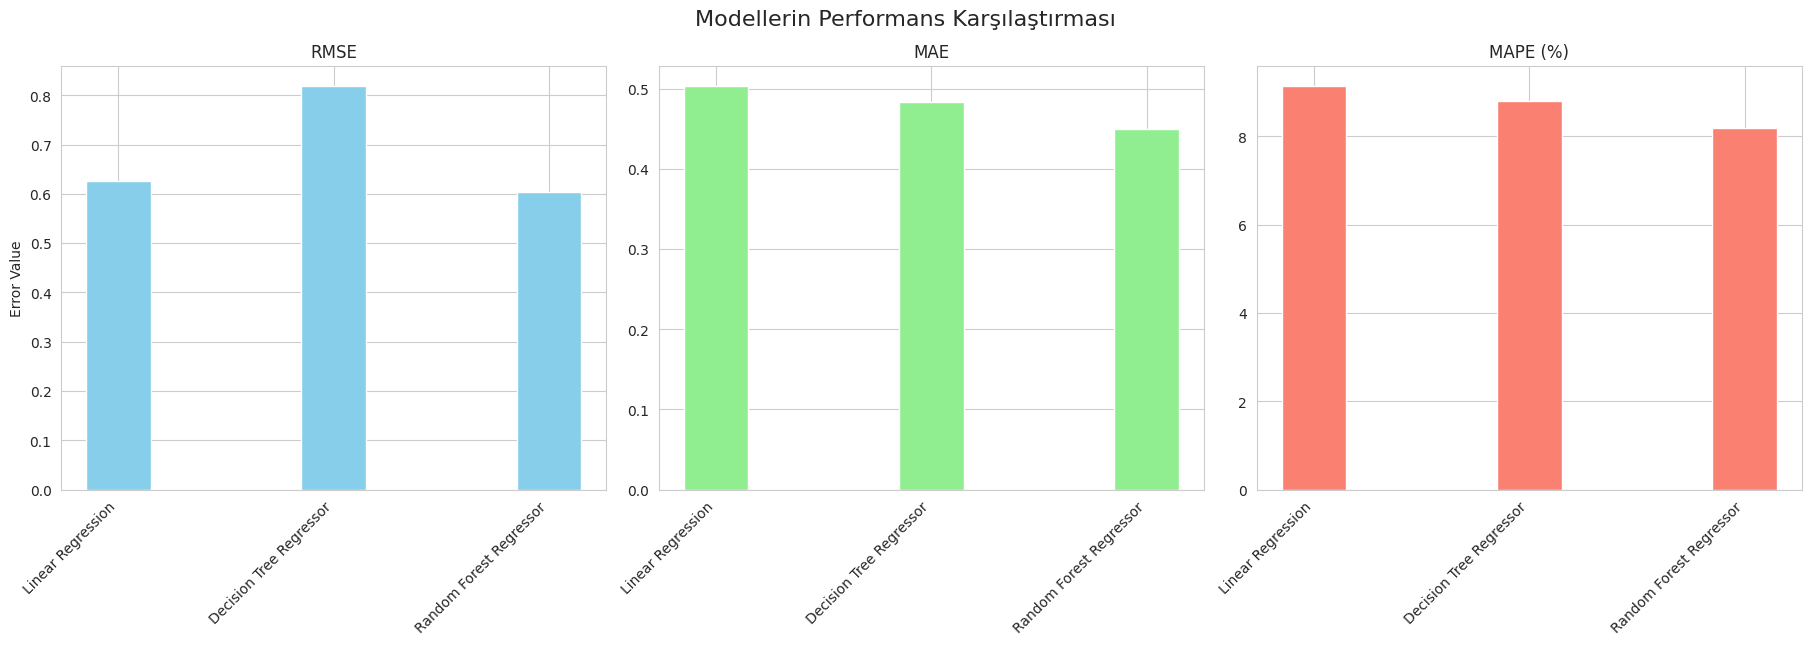

In [711]:
# MAPE sütununu düzelt
performance_df['MAPE'] = performance_df['MAPE'].str.replace('%', '').astype(float)

models = performance_df['Model']
rmse = performance_df['RMSE']
mae = performance_df['MAE']
mape = performance_df['MAPE']  # zaten yüzde

x = np.arange(len(models))
width = 0.3

fig, axs = plt.subplots(1, 3, figsize=(18,6), constrained_layout=True)

# RMSE
axs[0].bar(x, rmse, width, color='skyblue')
axs[0].set_title('RMSE')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, rotation=45, ha='right')
axs[0].set_ylabel('Error Value')

# MAE
axs[1].bar(x, mae, width, color='lightgreen')
axs[1].set_title('MAE')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, rotation=45, ha='right')

# MAPE
axs[2].bar(x, mape, width, color='salmon')
axs[2].set_title('MAPE (%)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(models, rotation=45, ha='right')

plt.suptitle("Modellerin Performans Karşılaştırması", fontsize=16, y=1.05)
plt.show()
